<a href="https://colab.research.google.com/github/WaleedAhmed565/Ai-lab1/blob/main/Copy_of_carPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving pakwheels_filtered_features.csv to pakwheels_filtered_features.csv


In [6]:
import pandas as pd

# Load CSV
df = pd.read_csv("pakwheels_filtered_features.csv")

# Display the first few rows
df.head()


,manufacturer,model,mileage,fuel_type,transmission,registered,color,price
0,Honda N One Premium 2014,2014,82000,Petrol,Automatic,Lahore,Blue,2650000
1,Nissan Note 2020,2020,59000,Hybrid,Automatic,Un-Registered,Silver,5400000
2,Suzuki Vitara GLX 1.6 2017,2017,67000,Petrol,Automatic,Karachi,Grey,0
3,Toyota Yaris Cross 2021,2021,41000,Hybrid,Automatic,Un-Registered,Beige,7850000
4,BMW X1 sDrive18i 2017,2017,37000,Petrol,Automatic,Islamabad,White,10700000


In [7]:
# Check for null values
print(df.isnull().sum())

# Drop rows with missing values (optional, or handle differently)
df.dropna(inplace=True)


manufacturer    0
model           0
mileage         0
fuel_type       0
transmission    0
registered      0
color           0
price           0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=['price'])  # adjust if your target column has a different name
y = df['price']

# Convert categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


MSE: 18799306851590.45
R² score: 0.5402868115895216


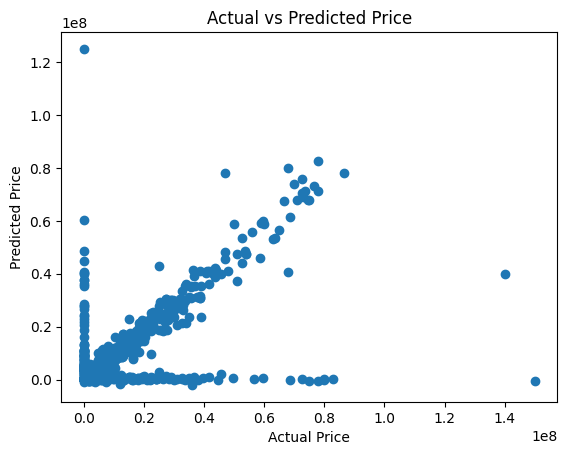

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [10]:
y_pred = model.predict(X_test)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 18799306851590.45
R² Score: 0.5402868115895216


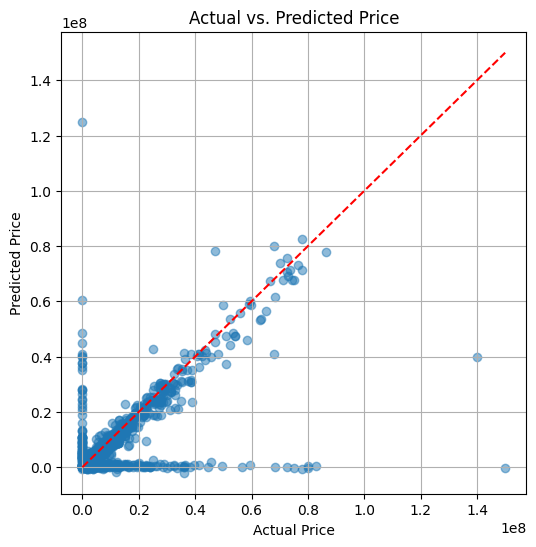

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y = x
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.grid(True)
plt.show()


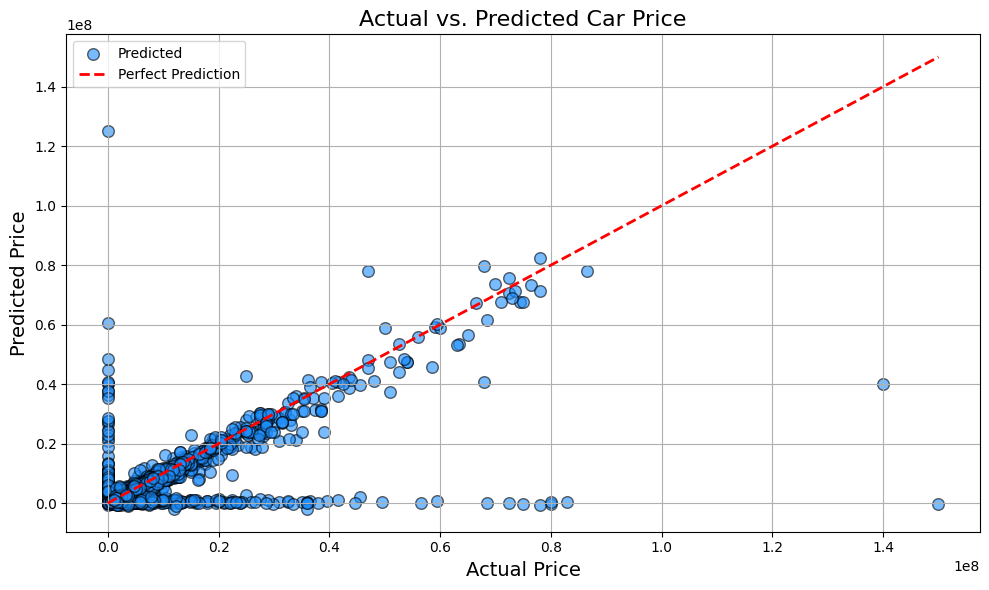

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolor='k', s=70, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs. Predicted Car Price', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import joblib
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("pakwheels_filtered_features.csv")
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 879807.3622905378
Mean Squared Error (MSE): 18799306851590.45
Root Mean Squared Error (RMSE): 4335816.745619036
R² Score: 0.5402868115895216
